In [1]:
import requests
import json
import os 
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as db
import seaborn as sns
%matplotlib inline
from datetime import date
import holidays

In [2]:
#Calling in the Quandl API Key 
api_key = os.getenv("QUANDL_API_KEY")
print(len(api_key))

20


In [5]:
#request_url = "https://www.quandl.com/api/v3/datasets/WIKI/AMD.json?api_key="

# Concatenate request_url and api_key. Store as new variable
#request_url_rfd = request_url + api_key

In [4]:
# Execute get request
#response_data = quandl.get("AAII/AAII_SENTIMENT")

In [5]:
#Reading In The Data From Quandl 
r#esponse_data

,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Date,,,,,,,,,,,,
1987-06-26,NaN,NaN,NaN,NaN,NaN,NaN,0.386014,0.489178,0.282850,NaN,NaN,NaN
1987-07-17,NaN,NaN,NaN,NaN,NaN,NaN,0.386014,0.489178,0.282850,314.59,307.63,314.59
1987-07-24,0.360000,0.500000,0.140000,1.000000,NaN,0.220000,0.386014,0.489178,0.282850,311.39,307.81,309.27
1987-07-31,0.260000,0.480000,0.260000,1.000000,NaN,0.000000,0.386014,0.489178,0.282850,318.66,310.65,318.66
1987-08-07,0.560000,0.150000,0.290000,1.000000,NaN,0.270000,0.386014,0.489178,0.282850,323.00,316.23,323.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-12,0.297386,0.189542,0.513072,1.000000,0.365320,-0.215686,0.380611,0.481238,0.279984,3130.97,2707.22,2741.38
2020-03-19,0.343511,0.145038,0.511450,0.999999,0.351257,-0.167939,0.380611,0.481238,0.279984,2825.60,2280.52,2398.10
2020-03-26,0.329016,0.150259,0.520725,1.000000,0.352411,-0.191709,0.380611,0.481238,0.279984,2571.42,2191.86,2475.56


In [3]:
#response_data.to_csv('Sentiment_Data.csv')

In [4]:
#Reading in and cleaning the CSV File 
sentiment_data = pd.read_csv('Sentiment_Data.csv')
sentiment_data = sentiment_data.dropna()
sentiment_data

,Date,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
9,1987-09-11,0.500000,0.230000,0.270000,1.000000,0.466250,0.230000,0.384907,0.488293,0.281522,321.98,313.56,321.98
10,1987-09-18,0.600000,0.290000,0.110000,1.000000,0.496250,0.490000,0.384907,0.488293,0.281522,323.08,314.86,314.86
11,1987-09-25,0.530000,0.170000,0.300000,1.000000,0.530000,0.230000,0.384907,0.488293,0.281522,321.19,310.54,320.16
12,1987-10-02,0.440000,0.260000,0.300000,1.000000,0.515000,0.140000,0.384907,0.488293,0.281522,328.07,321.69,328.07
13,1987-10-09,0.460000,0.390000,0.150000,1.000000,0.516250,0.310000,0.384907,0.488293,0.281522,328.08,311.07,311.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2020-03-12,0.297386,0.189542,0.513072,1.000000,0.365320,-0.215686,0.380611,0.481238,0.279984,3130.97,2707.22,2741.38
1705,2020-03-19,0.343511,0.145038,0.511450,0.999999,0.351257,-0.167939,0.380611,0.481238,0.279984,2825.60,2280.52,2398.10
1706,2020-03-26,0.329016,0.150259,0.520725,1.000000,0.352411,-0.191709,0.380611,0.481238,0.279984,2571.42,2191.86,2475.56
1707,2020-04-02,0.342391,0.160326,0.497283,1.000000,0.352871,-0.154892,0.380611,0.481238,0.279984,2641.39,2407.53,2470.50


In [5]:
#5 Year Dataframe
five_year_sentiment = sentiment_data.loc[1448:1708]
five_year_sentiment

,Date,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
1448,2015-04-16,0.320675,0.451477,0.227848,1.000000,0.348158,0.092827,0.384907,0.488293,0.281522,2111.91,2073.30,2106.63
1449,2015-04-23,0.314700,0.453416,0.231884,1.000000,0.330779,0.082816,0.384907,0.488293,0.281522,2111.91,2072.37,2107.96
1450,2015-04-30,0.308362,0.472125,0.219512,0.999999,0.319571,0.088850,0.384907,0.488293,0.281522,2125.92,2091.05,2106.85
1451,2015-05-07,0.270563,0.461039,0.268398,1.000000,0.313896,0.002165,0.384798,0.488237,0.281359,2120.95,2067.93,2080.15
1452,2015-05-14,0.267442,0.468992,0.263566,1.000000,0.313376,0.003876,0.384734,0.488168,0.281301,2117.69,2067.93,2098.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2020-03-12,0.297386,0.189542,0.513072,1.000000,0.365320,-0.215686,0.380611,0.481238,0.279984,3130.97,2707.22,2741.38
1705,2020-03-19,0.343511,0.145038,0.511450,0.999999,0.351257,-0.167939,0.380611,0.481238,0.279984,2825.60,2280.52,2398.10
1706,2020-03-26,0.329016,0.150259,0.520725,1.000000,0.352411,-0.191709,0.380611,0.481238,0.279984,2571.42,2191.86,2475.56
1707,2020-04-02,0.342391,0.160326,0.497283,1.000000,0.352871,-0.154892,0.380611,0.481238,0.279984,2641.39,2407.53,2470.50


In [6]:
five_year_sentiment = five_year_sentiment.reset_index()
five_year_sentiment

,index,Date,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
0,1448,2015-04-16,0.320675,0.451477,0.227848,1.000000,0.348158,0.092827,0.384907,0.488293,0.281522,2111.91,2073.30,2106.63
1,1449,2015-04-23,0.314700,0.453416,0.231884,1.000000,0.330779,0.082816,0.384907,0.488293,0.281522,2111.91,2072.37,2107.96
2,1450,2015-04-30,0.308362,0.472125,0.219512,0.999999,0.319571,0.088850,0.384907,0.488293,0.281522,2125.92,2091.05,2106.85
3,1451,2015-05-07,0.270563,0.461039,0.268398,1.000000,0.313896,0.002165,0.384798,0.488237,0.281359,2120.95,2067.93,2080.15
4,1452,2015-05-14,0.267442,0.468992,0.263566,1.000000,0.313376,0.003876,0.384734,0.488168,0.281301,2117.69,2067.93,2098.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,1704,2020-03-12,0.297386,0.189542,0.513072,1.000000,0.365320,-0.215686,0.380611,0.481238,0.279984,3130.97,2707.22,2741.38
257,1705,2020-03-19,0.343511,0.145038,0.511450,0.999999,0.351257,-0.167939,0.380611,0.481238,0.279984,2825.60,2280.52,2398.10
258,1706,2020-03-26,0.329016,0.150259,0.520725,1.000000,0.352411,-0.191709,0.380611,0.481238,0.279984,2571.42,2191.86,2475.56
259,1707,2020-04-02,0.342391,0.160326,0.497283,1.000000,0.352871,-0.154892,0.380611,0.481238,0.279984,2641.39,2407.53,2470.50


In [20]:
#Creating the 5 Year Bull/Bear Ratio in Jupyter 
bull_bear_indicator_5= (five_year_sentiment['Bullish']/(five_year_sentiment['Bullish']+five_year_sentiment['Neutral']+five_year_sentiment['Bearish']))

In [8]:
#What are the Percentiles
print("5th percentile of Bull/Bear : ", 
       np.percentile(bull_bear_indicator_5, 5)) 
print("95th percentile of Bull/Bear : ", 
       np.percentile(bull_bear_indicator_5, 95)) 

5th percentile of Bull/Bear :  0.221739
95th percentile of Bull/Bear :  0.451049


In [9]:
#Setting Percentile Bands 
tenth_percentile_5 = np.percentile(bull_bear_indicator_5, 10)
ninety_percentile_5 = np.percentile(bull_bear_indicator_5, 90)

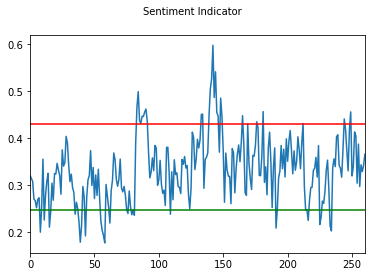

In [14]:
#Plotting the Bull/Bear Ratio 
plt.figure();
bull_bear_indicator_5.plot()
plt.suptitle('Sentiment Indicator', fontsize=10)
plt.axhline(tenth_percentile_5, color='g')
plt.axhline(ninety_percentile_5, color='r')

In [75]:
#Signals for Sentiment 
def sentiment_signal(bull_bear_indicator_5):
    results = []
    for i in bull_bear_indicator_5:
        if i <= tenth_percentile_5:
            results.append(1)
        elif i >= ninety_percentile_5:
            results.append(-1)
        else: 
            results.append(0)
    
    return results


In [76]:
sentiment_signal_= sentiment_signal(bull_bear_indicator_5)

In [77]:
signal_df = pd.DataFrame(sentiment_signal_)
signal_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
256,0
257,0
258,0
259,0


In [78]:
#Setting the Signal 
new_df = pd.concat([five_year_sentiment['Date'], signal_df], axis='columns', join='inner')
new_df.index = new_df['Date']
new_df = new_df.iloc[:, 1:]
new_df.head()

,0
Date,
2015-04-16,0
2015-04-23,0
2015-04-30,0
2015-05-07,0
2015-05-14,0


In [79]:
new_df.describe()

,0
count,261.000000
mean,0.000000
std,0.455733
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [80]:
new_df.index = pd.DatetimeIndex(new_df.index)
new_df.head()
new_df.describe()

,0
count,261.000000
mean,0.000000
std,0.455733
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [81]:
new_df.describe()

,0
count,261.000000
mean,0.000000
std,0.455733
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [82]:
#Setting the New Dataframe
new_signal_df = new_df.rename(columns = {0: 'AAII Sentiment Signal'})
new_signal_df.tail()

,AAII Sentiment Signal
Date,
2020-03-12,0
2020-03-19,0
2020-03-26,0
2020-04-02,0
2020-04-09,0


In [83]:
#Reading in and cleaning the CSV File 
stock_data = pd.read_csv('stock_data_five.csv')
stock_data.rename(columns = {"Unnamed: 0":"Date"},inplace = True)
stock_data.dropna(inplace=True)
stock_data.set_index("Date",inplace=True)
stock_data.head()

,MSFT,GOOGL,JPM,ODFL,ALB,GILD,JNJ,CAT,V,NEE
Date,,,,,,,,,,
2015-04-13,41.76,548.64,62.07,48.0,58.38,102.28,100.55,82.14,65.61,103.75
2015-04-14,41.65,539.78,63.04,48.13,58.97,102.21,100.52,83.0,65.53,104.36
2015-04-15,42.26,541.04,64.21,48.39,59.31,104.03,100.6,85.16,65.68,104.18
2015-04-16,42.16,543.52,63.81,48.67,58.74,103.34,99.79,84.34,65.65,103.76
2015-04-17,41.62,532.74,62.84,48.52,59.05,101.38,99.58,83.28,64.52,103.15


In [84]:
#Adding in the Sentiment
full_df = pd.merge(stock_data,new_signal_df,left_index=True, right_index=True, how = 'left')
full_df.fillna(method = 'ffill', inplace = True)
full_df.dropna(inplace=True)
full_df

,MSFT,GOOGL,JPM,ODFL,ALB,GILD,JNJ,CAT,V,NEE,AAII Sentiment Signal
Date,,,,,,,,,,,
2015-04-16,42.16,543.52,63.81,48.67,58.74,103.34,99.79,84.34,65.65,103.76,0.0
2015-04-17,41.62,532.74,62.84,48.52,59.05,101.38,99.58,83.28,64.52,103.15,0.0
2015-04-20,42.91,544.53,63.24,49.49,59.19,100.66,100.21,84.6,64.72,104.5,0.0
2015-04-21,42.64,542.92,62.31,49.86,58.75,105.2,100.3,83.92,65.35,103.4,0.0
2015-04-22,42.99,549.18,62.94,49.67,58.94,104.18,100.43,84.87,68.01,103.29,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-03,153.83,1092.7,84.05,122.51,52.7,78.21,134.17,114.67,151.85,221.64,0.0
2020-04-06,165.27,1183.19,89.46,138.18,56.93,77.73,139.76,120.43,169.44,234.51,0.0
2020-04-07,163.49,1182.56,90.64,142.64,57.0,74.67,137.48,121.92,168.59,228.49,0.0


In [85]:
test_full = full_df

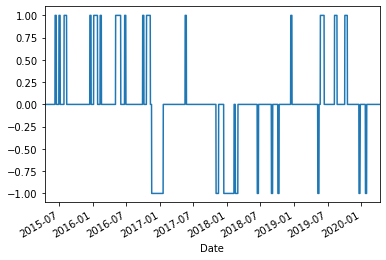

In [87]:
full_df['AAII Sentiment Signal'].plot()

In [61]:
(full_df[0]**2).sum()

131.0

In [71]:
# Set initial capital
initial_capital = float(100000)

# Set the share size
share_size = 500

# Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA100)
test_full['Position'] = share_size * test_full['AAII Sentiment Signal']

# Find the points in time where a 500 share position is bought or sold
test_full['Entry/Exit Position'] = test_full['Position'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
test_full['Portfolio Holdings'] = test_full['MSFT'] * test_full['AAII Sentiment Signal'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
test_full['Portfolio Cash'] = initial_capital - (test_full['MSFT'] * test_full['AAII Sentiment Signal']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
test_full['Portfolio Total'] = test_full['Portfolio Cash'] + test_full['Portfolio Holdings']

# Calculate the portfolio daily returns
test_full['Portfolio Daily Returns'] = test_full['Portfolio Total'].pct_change()

# Calculate the cumulative returns
test_full['Portfolio Cumulative Returns'] = (1 + test_full['Portfolio Daily Returns']).cumprod() - 1

# Print the DataFrame
test_full.tail(10)

TypeError: can't multiply sequence by non-int of type 'float'